In [1]:
import numpy as np
import network_design as nd
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in la

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/shared/centos7/anaconda3/2022.05/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in la

AttributeError: _ARRAY_API not found

In [2]:
g = nx.fast_gnp_random_graph(10,.3)

In [3]:
A = nx.adjacency_matrix(g).toarray()

In [20]:
# X = nd.generate_node_assignments(100,2)
X = np.zeros((100,2))
X[:70,0] = 1
X[70:,1] = 1

In [21]:
# capacities = nd.assign_particles(3,4)
N_circle = X[:,0].sum()
N_triangle = X[:,1].sum()

In [22]:
ratio_circle = N_circle / (N_circle + N_triangle)
ratio_triangle = N_triangle / (N_circle + N_triangle)

In [23]:
capacities = {0:{0:1+ratio_circle,1:ratio_triangle},1:{0:1 + ratio_circle,1:1 + ratio_triangle}}

In [24]:
O = np.zeros((len(capacities.keys()),len(capacities.keys())))
for i in capacities.keys():
    for j in capacities.keys():
        O[i,j] = capacities[i][j]

In [25]:
O

array([[1.7, 0.3],
       [1.7, 1.3]])

In [26]:
deg_circle = np.zeros(100)
deg_triangle = np.zeros(100)
for i in range(100):
    g = nd.canonical_ensemble(X.sum(axis=0).astype(int),O,X,directed=True)
    mask_circle = X[:,0].astype(bool)
    mask_triangle = X[:,1].astype(bool)
    deg = np.array(g.out_degree())[:,1]
    deg_circle[i] = np.mean(deg[mask_circle])
    deg_triangle[i] = np.mean(deg[mask_triangle])

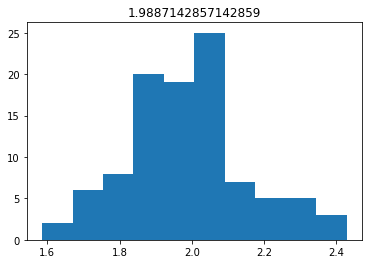

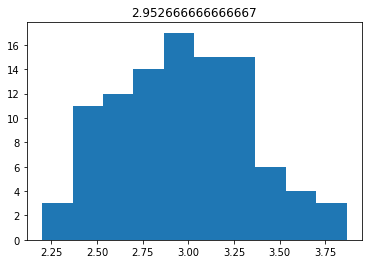

In [27]:
plt.hist(deg_circle)
plt.title(np.mean(deg_circle))
plt.show()
plt.hist(deg_triangle)
plt.title(np.mean(deg_triangle))
plt.show()

In [15]:
g, P = nd.canonical_ensemble(X.sum(axis=0).astype(int),O,X,directed=True,ret_P=True)

In [17]:
P.sum(axis=1)[mask_circle]

array([2.        , 1.95666667, 1.91333333, 1.87      , 1.82666667,
       1.78333333, 1.74      , 1.69666667, 1.65333333, 1.61      ,
       1.56666667, 1.52333333, 1.48      , 1.43666667, 1.39333333,
       1.35      , 1.30666667, 1.26333333, 1.22      , 1.17666667,
       1.13333333, 1.09      , 1.04666667, 1.00333333, 0.96      ,
       0.91666667, 0.87333333, 0.83      , 0.78666667, 0.74333333])

In [54]:
def color_nodes(X):
    colors = []
    for i in range(len(X)):
        if np.where(X[i]==1)[0] == 0:
            colors.append('deepskyblue')
        else:
            colors.append('red')
    return colors

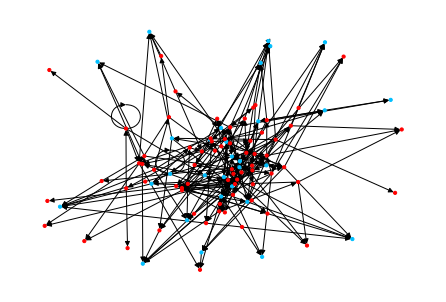

In [112]:
nx.draw(g,node_color=color_nodes(X),node_size=10,width=1)

deg = np.array(g.degree())[:,1]

In [65]:
h = nx.subgraph(g,sorted(list(nx.connected_components(g)),key=len,reverse=True)[0])
deg = np.array(h.degree())[:,1]

Text(0.5, 1.0, '2.345029239766082')

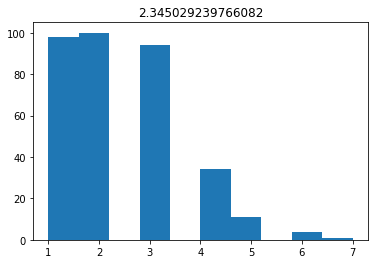

In [69]:
plt.hist(deg[mask])
plt.title(deg[mask].mean())

In [68]:
mask = X[list(h.nodes()),0].astype(bool)

In [20]:
mask

array([False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True, False, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False,  True, False, False,  True,  True,
       False,  True,  True, False, False, False,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True, False, False, False,  True,  True, False,  True, False,
        True, False,